In [3]:
# Import libraries

import pandas as pd
from skimage.color import rgb2hed
import skimage
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
""" Consolidated Table for all Model performance metrics """

import pandas as pd

# Model performance results
model_performance = [
    {'Model': 'MLP LR Q2(ii)', 'Protein': 'NESTIN', 'RMSE': 0.5582, 'Pearson Correlation': 0.5064, 'Spearman Correlation': 0.6021, 'R2 Score': 0.2565},
    {'Model': 'SVR Q2(ii)', 'Protein': 'NESTIN', 'RMSE': 0.5765, 'Pearson Correlation': 0.4552, 'Spearman Correlation': 0.6190, 'R2 Score': 0.2072},
    {'Model': 'CNN Q3(i)', 'Protein': 'NESTIN', 'RMSE': 0.5366, 'Pearson Correlation': 0.6333, 'Spearman Correlation': 0.7033, 'R2 Score': 0.3427},
    {'Model': 'CNN Q3(ii)', 'Protein': 'EGFR', 'RMSE': 0.206648, 'Pearson Correlation': 0.666864, 'Spearman Correlation': 0.605325, 'R2 Score': 0.328822},
    {'Model': 'CNN Q3(ii)', 'Protein': 'PTEN', 'RMSE': 0.676169, 'Pearson Correlation': 0.851377, 'Spearman Correlation': 0.625470, 'R2 Score': 0.634239},
    {'Model': 'CNN Q3(ii)', 'Protein': 'NESTIN', 'RMSE': 0.393539, 'Pearson Correlation': 0.779531, 'Spearman Correlation': 0.708123, 'R2 Score': 0.556992},
    {'Model': 'CNN Q3(ii)', 'Protein': 'SOX2', 'RMSE': 0.668912, 'Pearson Correlation': 0.701870, 'Spearman Correlation': 0.696671, 'R2 Score': 0.467012},
    {'Model': 'CNN Q3(ii)', 'Protein': 'MET', 'RMSE': 0.572549, 'Pearson Correlation': 0.801248, 'Spearman Correlation': 0.688360, 'R2 Score': 0.567592}
]
# Create dataframe
performance_df = pd.DataFrame(model_performance)

# Sort by Pearson correlation coefficient
performance_df = performance_df.sort_values(by='Pearson Correlation', ascending=False)

# Display the dataframe
display(performance_df)

,Model,Protein,RMSE,Pearson Correlation,Spearman Correlation,R2 Score
4,CNN Q3(ii),PTEN,0.676169,0.851377,0.625470,0.634239
7,CNN Q3(ii),MET,0.572549,0.801248,0.688360,0.567592
5,CNN Q3(ii),NESTIN,0.393539,0.779531,0.708123,0.556992
6,CNN Q3(ii),SOX2,0.668912,0.701870,0.696671,0.467012
3,CNN Q3(ii),EGFR,0.206648,0.666864,0.605325,0.328822
2,CNN Q3(i),NESTIN,0.536600,0.633300,0.703300,0.342700
0,MLP LR Q2(ii),NESTIN,0.558200,0.506400,0.602100,0.256500
1,SVR Q2(ii),NESTIN,0.576500,0.455200,0.619000,0.207200


In [4]:
# Read the data (Given preperation code)
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
df.reset_index(inplace=True)
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']
print(df)


# Create train and test dataframes based on the outlined specimen split
train_df = df[df['specimen_id'].isin(['A1', 'B1', 'D1'])]
test_df = df[df['specimen_id'] == 'C1']

     image_id  Unnamed: 0                VisSpot  Location_Center_Y  \
0     A1_0x40         412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
1     A1_0x42        7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
2     A1_0x44        8102  TCACTCAGCGCATTAG-1-A1         832.902467   
3     A1_0x46        7085  GTGCGCTTACAAATGA-1-A1         858.343544   
4     A1_0x48        3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...       ...         ...                    ...                ...   
9916  D1_9x63        3609  CCTCCCGACAATCCCT-1-D1         123.760525   
9917  D1_9x65         172  AACACGACTGTACTGA-1-D1          29.281573   
9918  D1_9x67        2686  CACCGCCGACCAGCGA-1-D1         938.403662   
9919  D1_9x69        2813  CAGAGTGATTTAACGT-1-D1         844.093656   
9920  D1_9x71        6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

      Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
0            247.700528 -2.895476 -1.445686 -1.875972 -3.456108  0.461

In [16]:
""" This cell creates new folders which contain training and test images only if they have a NESTIN value in the dataset """

import os
from skimage import io
from skimage.color import rgba2rgb

# Original image folder
original_folder = 'patches_256/'

# New folders for training and test images
train_folder = 'train_images/'
test_folder = 'test_images/'

# Create the folders if they don't exist
if not os.path.exists(train_folder):
    os.makedirs(train_folder)

if not os.path.exists(test_folder):
    os.makedirs(test_folder)

# Loop through each image file in the original folder
for filename in os.listdir(original_folder):
    # Image path
    image_file = os.path.join(original_folder, filename)

    # Extract image ID from filename
    image_id = filename.split('.')[0]

    # Load the image
    image = io.imread(image_file)

    # Check if the image ID corresponds to a training or test image
    if image_id.startswith(('A1', 'B1', 'D1')):
        # Check if the image has a corresponding NESTIN value
        if image_id in train_df['image_id'].values:
            # Save the image to the training folder
            io.imsave(os.path.join(train_folder, filename), image)
    elif image_id.startswith('C1'):
        # Check if the image has a corresponding NESTIN value
        if image_id in test_df['image_id'].values:
            # Save the image to the test folder
            io.imsave(os.path.join(test_folder, filename), image)


/var/folders/ml/l47r061n4qbdj1csyg6rt1j00000gn/T/ipykernel_7946/1853137177.py:37: UserWarning: train_images/B1_26x52.png is a low contrast image
  io.imsave(os.path.join(train_folder, filename), image)
/var/folders/ml/l47r061n4qbdj1csyg6rt1j00000gn/T/ipykernel_7946/1853137177.py:37: UserWarning: train_images/D1_49x53.png is a low contrast image
  io.imsave(os.path.join(train_folder, filename), image)


skimage version 0.19.2


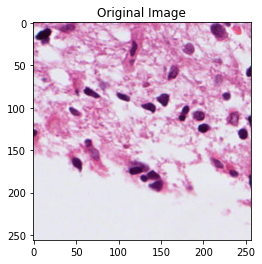

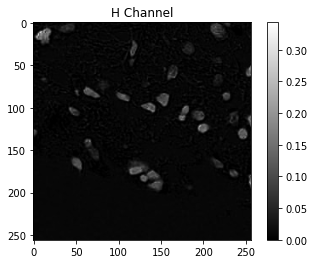

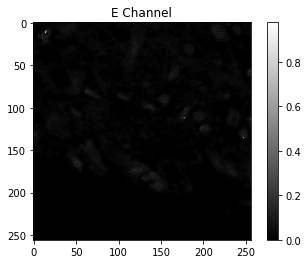

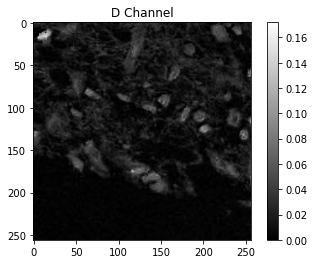

In [17]:
# Showing Example Image
image_folder = 'patches_256/'

# Replace 'path_to_image' with the path to the image you want to display
image_path = image_folder+'A1_0x40.png'
print('skimage version',skimage.__version__)
import matplotlib.pyplot as plt
I = rgba2rgb(imread(image_path)) #read sample RGB image
I_hed =  rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()
I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h,cmap='gray');plt.colorbar();plt.title('H Channel');plt.show()
I_e = I_hed[:,:,1]; plt.figure();  plt.imshow(I_e,cmap='gray');plt.colorbar();plt.title('E Channel');plt.show()
I_d = I_hed[:,:,2]; plt.figure();  plt.imshow(I_d,cmap='gray');plt.colorbar();plt.title('D Channel');plt.show()

# Question 1: Data Analysis

In [18]:
""" Part i - Counting Examples """

# Count the number examples/spots from the loaded panda dataframe (df) using specimen_id column
spot_counts = df['specimen_id'].value_counts()

print("Number of spots in each specimen:")
print(spot_counts)

Number of spots in each specimen:
C1    4129
A1    2894
D1    1753
B1    1145
Name: specimen_id, dtype: int64


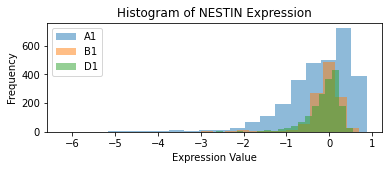

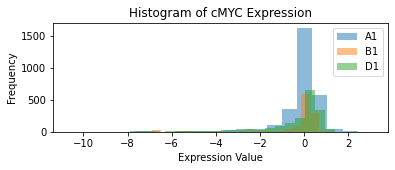

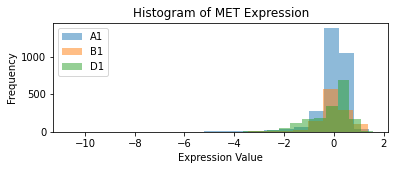

In [19]:
""" Part ii - Protein Expression Histograms """

# Filter the training data frame for relevant specimens and proteins
relevant_columns = ['specimen_id', 'NESTIN', 'cMYC', 'MET']
filtered_df = train_df[relevant_columns]

# Group by the specimen
grouped_df = filtered_df.groupby('specimen_id')

# Specimen names for plots
protein_names = ['NESTIN', 'cMYC', 'MET']

# Plot histogram for each protein with all specimens
for protein_name in protein_names:
    plt.figure(figsize=(6, 2))
    for specimen_id, group in grouped_df:
        plt.hist(group[protein_name], bins=20, alpha=0.5, label=specimen_id)

    plt.title(f'Histogram of {protein_name} Expression')
    plt.xlabel('Expression Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### Part (ii) - Observations

We know that the A1 specimen contains the most samples and thus the frequency is higher in all 3 histograms as expected. However, we can see that the NESTIN expression has a wider distribution than the other 2 proteins for A1. Both ccMYC and MET have the same expression value scale which is slightly larger than NESTIN indicating consistent expression patterns. Both B1 and D1 specimens have very similar concentration of expression values and frequencies suggesting the images for these specimens contain consistent and comparable expression profiles and potential common biological characteristics in these specimens. In all 3 histograms (proteins) for all 3 specimens there are distinct peaks at the 0 expression value area indicating that significant portions of the images may contain regions with no detectable protein expressions. This may indicate that in these areas of the images the 3 selected proteins are not present or it may represent background areas of the images.

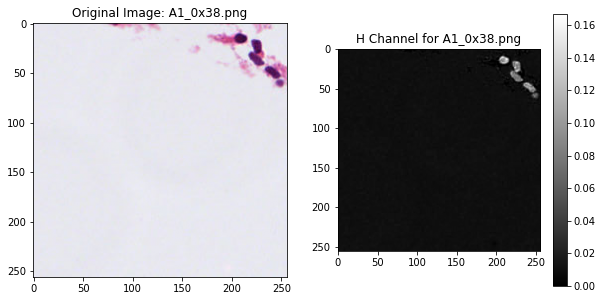

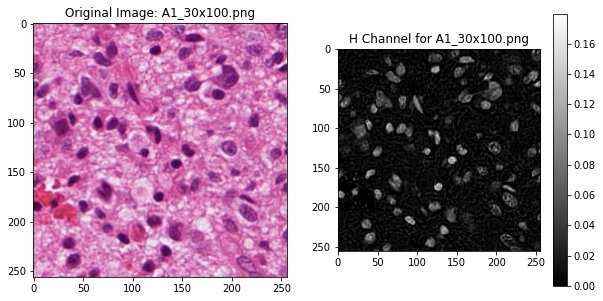

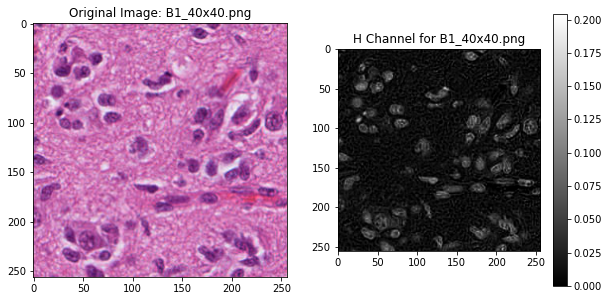

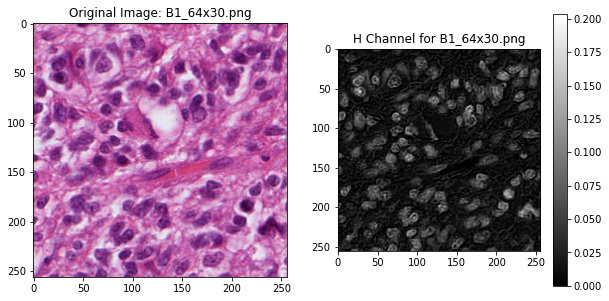

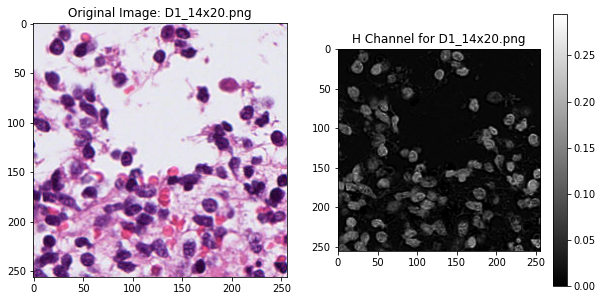

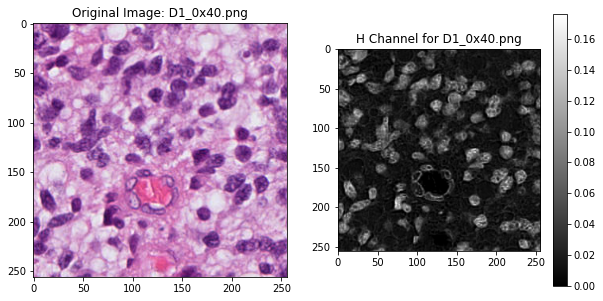

In [20]:
""" Part iii - Image Pre-processing """

# Define the path to the folder containing your images
image_folder = 'patches_256/'

# Random selection of images
image_files = ['A1_0x38.png', 'A1_30x100.png', 'B1_40x40.png', 'B1_64x30.png', 'D1_14x20.png', 'D1_0x40.png']

# Cycle through each selected image
for image in image_files:
    image_file = image_folder+image

    # D1 specimens are already in RGB format (3 dimensions) therefore do not require conversion from rgba to rgb
    # try catch block overcomes errors
    try:
        I = rgba2rgb(imread(image_file))    # read sample RGB image
    except ValueError:
        I = imread(image_file)              # read D1 images
    
    I_hed =  rgb2hed(I) #convert to HED

    # Create grid for each image plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot original image
    axes[0].imshow(I)
    axes[0].set_title('Original Image: ' + image)

    # Plot HED converted image
    I_h = I_hed[:,:,0]
    im = axes[1].imshow(I_h, cmap='gray')
    axes[1].set_title('H Channel for ' + image)
    fig.colorbar(im, ax=axes[1])
    plt.show()


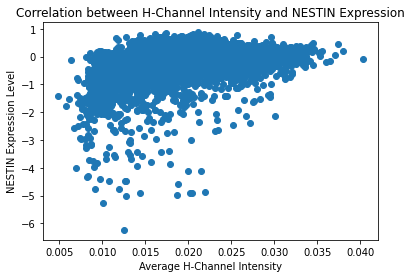

Correlation coefficient: 0.379616309866266


In [21]:
""" Part iv - H-channel Analysis """

# Image folder path
image_folder = 'patches_256/'

# Initiate empty lists for storing H-Channel instensities and corresponding NESTIN values
h_channel_intensities = []
nestin_expression_levels = []

# Loop through each image
for filename in os.listdir(image_folder):
    # Exclude C1 specimens
    if 'C1' in filename:
        continue
    
    # Get image id without .png
    image_id = os.path.splitext(filename)[0]

    # Construct the full path to the image
    image_file = image_folder+filename

    # D1 specimens are already in RGB format (3 dimensions) therefore do not require conversion from rgba to rgb
    # try catch block overcomes errors
    try:
        I = rgba2rgb(imread(image_file))    # read sample RGB image
    except ValueError:
        I = imread(image_file)              # read D1 images

    # Convert to HED  
    image_hed =  rgb2hed(I)
    
    # Extract the H-channel from image
    h_channel = image_hed[:, :, 0]
    
    # Calculate the mean intensity of the H-channel
    h_channel_intensity = np.mean(h_channel)

    # Find the corresponding NESTIN expression level from current image
    nestin_expression = train_df[train_df['image_id'] == image_id]['NESTIN'].values

    # Check image exists in proteins data set so that there is a corresponding NESTIN value
    if nestin_expression.any():
        # Append the values to the respective lists
        h_channel_intensities.append(h_channel_intensity)
        nestin_expression_levels.append(train_df[train_df['image_id'] == image_id]['NESTIN'].values[0])

# Create a scatter plot comparing H-channel intensities with NESTIN expression levels
plt.scatter(h_channel_intensities, nestin_expression_levels)
plt.xlabel('Average H-Channel Intensity')
plt.ylabel('NESTIN Expression Level')
plt.title('Correlation between H-Channel Intensity and NESTIN Expression')
plt.show()

# Calculate the correlation coefficient between H-channel intensities and NESTIN expression levels
correlation_coefficient = np.corrcoef(h_channel_intensities, nestin_expression_levels)[0, 1]
print("Correlation coefficient:", correlation_coefficient)

### Part (iv) - Discussion

Whilst the above scatter plot demonstrates a high concentration of data points, the placement and direction of the data points demonstrates that there does not appear to be a distinct linear pattern of correlation (diagnol line desired), with variance in data points especially at the lower H-Channel intensities. Further to this the correlation coefficient for the h-channel intensities and nestin values is 0.3796. This correlation coefficient value implies that there exists some association between the 2 features with a weak positive correlation. However, this value is considered as a weak correlation with low association. Therefore i would argue that this does not demonstrate a good potential for the H-Channel average to be a predictor for the NESTIN expression. This is because the correlation coefficient value and scatter plot do not demonstrate a strong, or even moderate correlation between the two features. For me to consider there to be potential for prediction i would look for a correlation coefficient value of at least above 0.7 or below -0.7.

### Part (v) - Performance Metrics for Predictions

Given that the task is concentrating on building **regression** models for predicting protein expressions from images, i would consider the following as suitable performance metrics:
- Mean Absolute Error (MAE):
    - This measures absolute difference between predicted values and actual values.
- Mean Squared Error (MSE):
    - This measures average of the squares of the errors between predicted and actual values with more weight to larger errors.
- Root Mean Squared Error (RMSE):
    - This is the same as MSE but it takes the square root of the MSE bringing the values back down to scale.
- R-Squared Score (R2 Score):
    - This represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

I identify the MAE as the best performance metric for the task. This is because we can see a concentration of data points with some extreme expression levels. Whilst RMSE is also a very solid performance metric, using MAE will provide less sensitivity to these outliers and directly measures the average magnitude of errors in the predicted protein expression levels. It will provide a easily interpretable average deviation between predicted and actual protein expression values.

# Question 2: Feature Extraction and Classical regression

## Part (i)

In [22]:
""" Prepare Data Arrays """

""" Due to constant Kernel crashes, I have to use a random collection of 1000 of the training images.
    Various memory reduction techniques were tried but all cause kernel crashes despite me having a powerful laptop. """

from skimage import io

count = 0

# Initialise arrays for storing train and test images and their corresponding NESTIN values
train_images = []
train_nestin_vals = []

# Image folder
image_folder = 'patches_256/'

# Loop through each image
# Due to Kernel crashes i have to use a random selection of 1000 images from training image folder
for filename in os.listdir(image_folder):
    if count == 2000:
        break

    # Image path
    image_file = image_folder+filename

    # Extract image ID from filename
    image_id = filename.split('.')[0]

    # D1 specimens are already in RGB format (3 dimensions) therefore do not require conversion from rgba to rgb
    # try catch block overcomes errors
    try:
        I = rgba2rgb(io.imread(image_file))    # read sample RGB image
    except ValueError:
        I = io.imread(image_file)              # read D1 images

    # Training specimen images
    if 'A1' in filename or 'B1' in filename or 'D1' in filename:
        # Find the corresponding NESTIN expression level from current image
        nestin_expression = train_df[train_df['image_id'] == image_id]['NESTIN'].values
        # Check image exists in proteins data set so that there is a corresponding NESTIN value
        if nestin_expression.any():
            # Append the values to the respective lists
            train_nestin_vals.append(train_df[train_df['image_id'] == image_id]['NESTIN'].values[0])
            train_images.append(I)

            count += 1

# Convert lists to numpy arrays
train_images_np = np.array(train_images)
train_nestin_vals_np = np.array(train_nestin_vals)

In [23]:
""" Part (i) - Question 1 """

from skimage import io

# Initialize lists to store average values for each channel
h_avg_values = []
r_avg_values = []
g_avg_values = []
b_avg_values = []

image_folder = 'train_images/'

# Loop through each image
for filename in os.listdir(image_folder):

    # Construct the full path to the image
    image_file = image_folder+filename

    # D1 specimens are already in RGB format (3 dimensions) therefore do not require conversion from rgba to rgb
    # try catch block overcomes errors
    try:
        image = rgba2rgb(io.imread(image_file))    # read sample RGB image
    except ValueError:
        image = io.imread(image_file)              # read D1 images

    # Convert to HED  
    image_hed =  rgb2hed(image)

    # Split the image into specified channels
    h_channel = image_hed[:, :, 0]
    r_channel = image[:, :, 0]
    g_channel = image[:, :, 1]
    b_channel = image[:, :, 2]

    # Calculate average values for each channel and append to the list
    h_avg_values.append(np.mean(h_channel))
    r_avg_values.append(np.mean(r_channel))
    g_avg_values.append(np.mean(g_channel))
    b_avg_values.append(np.mean(b_channel))

# Calculate the overall average and variance for each channel
h_avg_overall = np.mean(h_avg_values)
r_avg_overall = np.mean(r_avg_values)
g_avg_overall = np.mean(g_avg_values)
b_avg_overall = np.mean(b_avg_values)

h_var_overall = np.var(h_avg_values)
r_var_overall = np.var(r_avg_values)
g_var_overall = np.var(g_avg_values)
b_var_overall = np.var(b_avg_values)

# Print the overall results
print("Overall H channel Average:", h_avg_overall)
print("Overall H channel Variance:", h_var_overall)
print("\nOverall Red channel Average:", r_avg_overall)
print("Overall Red channel Variance:", r_var_overall)
print("\nOverall Green channel Average:", g_avg_overall)
print("Overall Green channel Variance:", g_var_overall)
print("\nOverall Blue channel Average:", b_avg_overall)
print("Overall Blue channel Variance:", b_var_overall) 

Overall H channel Average: 0.01927578667625628
Overall H channel Variance: 3.525327630907491e-05

Overall Red channel Average: 59.20354587295412
Overall Red channel Variance: 7894.853592048875

Overall Green channel Average: 44.18112157073262
Overall Green channel Variance: 4584.7225429308655

Overall Blue channel Average: 58.78300013815434
Overall Blue channel Variance: 7824.6842622282165


Number of dimensions explaining 95% variance: 102


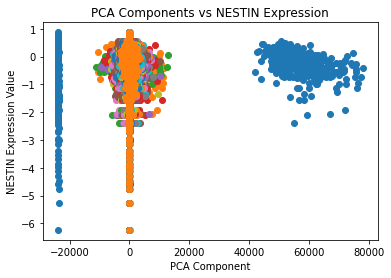

Top 5 Correlation Coefficients:
Correlation with NESTIN for PCA Component 2: -0.1605109056914075
Correlation with NESTIN for PCA Component 1: 0.041559810198365583
Correlation with NESTIN for PCA Component 6: 0.03778241661301525
Correlation with NESTIN for PCA Component 26: -0.0308340339181119
Correlation with NESTIN for PCA Component 33: 0.03044592244731498


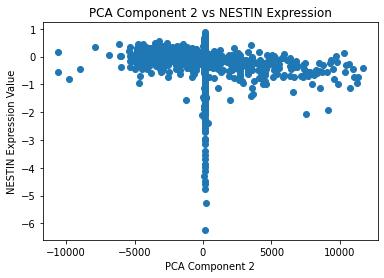

In [24]:
""" Part (i) - Question 2: PCA Feature Extraction """

from sklearn.decomposition import PCA

# This runs the PCA on the original images

# Initialise lists for features and nestin values
feature_vectors = []

# Loop through each image
for image in train_images_np:

    # Flatten the image into a feature vector
    flattened_image = image.flatten()
    feature_vectors.append(flattened_image)

# Convert the list of feature vectors to a numpy array
X = np.array(feature_vectors)

# Apply PCA to determine the number of components explaining 95% of the variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# Determine the number of components explaining 95% of the variance
explained_variance_ratio_cumulative = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95_percent = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components_95_percent)
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print(f"Number of dimensions explaining 95% variance: {num_components_95_percent}")

# Create a scatter plot for every PCA component against NESTIN
for i in range(X_pca.shape[1]):
    plt.scatter(X_pca[:, i], train_nestin_vals_np, label=f'PCA Component {i+1}')
plt.xlabel('PCA Component')
plt.ylabel('NESTIN Expression Value')
plt.title('PCA Components vs NESTIN Expression')
plt.show()

# Initiate correlation coefficients list
pca_correlation_coefficients = []

# Iterate over the number of PCA components
for i in range(X_pca.shape[1]):
    pca_component = X_pca[:, i]

    # Calculate correlation coefficient of PCA component with NESTIN and appen to list
    correlation = np.corrcoef(pca_component, train_nestin_vals_np)[0, 1]
    pca_correlation_coefficients.append((i, correlation))

# Sort correlation coefficients based on the absolute value of correlation
pca_correlation_coefficients_sorted = sorted(pca_correlation_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 correlation coefficients
print("Top 5 Correlation Coefficients:")
for i in range(min(5, len(pca_correlation_coefficients_sorted))):
    index, correlation = pca_correlation_coefficients_sorted[i]
    print(f"Correlation with NESTIN for PCA Component {index+1}: {correlation}")

# Get the index of the PCA component with the highest correlation with NESTIN
index_of_best_correlation = pca_correlation_coefficients_sorted[0][0]

# Plot the PCA component with the best correlation against NESTIN
plt.scatter(X_pca[:, index_of_best_correlation], train_nestin_vals_np)
plt.xlabel(f'PCA Component {index_of_best_correlation + 1}')
plt.ylabel('NESTIN Expression Value')
plt.title(f'PCA Component {index_of_best_correlation + 1} vs NESTIN Expression')
plt.show()


Number of dimensions explaining 95% variance: 1535


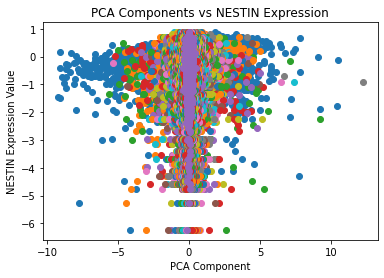

Top 5 Correlation Coefficients:
Correlation with NESTIN for PCA Component 2: 0.48524460326594165
Correlation with NESTIN for PCA Component 1: 0.11583268723014753
Correlation with NESTIN for PCA Component 20: -0.09344505772665995
Correlation with NESTIN for PCA Component 5: 0.07844870208378331
Correlation with NESTIN for PCA Component 4: -0.06964650496955235


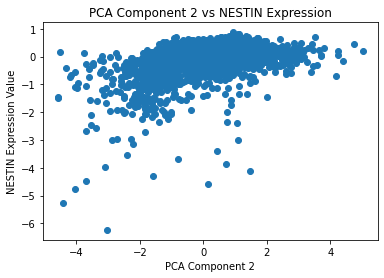

In [25]:
""" Part (i) - Question 2: PCA Feature Extraction """

""" Obtained much better correlation results when first converting the images to HED formats
    Thus i run the PCA on the HED images. """

from sklearn.decomposition import PCA

# Initialise lists for features and nestin values
hed_pca_feature_vectors = []

# Loop through each image
for image in train_images:

    # Convert to HED  
    image_hed = rgb2hed(image)

    # Flatten the image into a feature vector
    flattened_image = image_hed.flatten()
    hed_pca_feature_vectors.append(flattened_image)

# Convert the list of feature vectors to a numpy array
X_hed = np.array(hed_pca_feature_vectors)

# Apply PCA to determine the number of components explaining 95% of the variance
hed_pca_full = PCA()
X_hed_pca_full = hed_pca_full.fit_transform(X_hed)

# Determine the number of components explaining 95% of the variance
explained_variance_ratio_cumulative_hed = np.cumsum(hed_pca_full.explained_variance_ratio_)
num_components_95_percent_hed = np.argmax(explained_variance_ratio_cumulative_hed >= 0.95) + 1

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components_95_percent_hed)
X_hed_pca = pca.fit_transform(X_hed)

# Print the explained variance ratio
print(f"Number of dimensions explaining 95% variance: {num_components_95_percent_hed}")

# Create a scatter plot for every PCA component against NESTIN
for i in range(X_hed_pca.shape[1]):
    plt.scatter(X_hed_pca[:, i], train_nestin_vals_np, label=f'PCA Component {i+1}')
plt.xlabel('PCA Component')
plt.ylabel('NESTIN Expression Value')
plt.title('PCA Components vs NESTIN Expression')
plt.show()

# Initiate correlation coefficients list
hed_pca_correlation_coefficients = []

# Iterate over the number of PCA components
for i in range(X_hed_pca.shape[1]):
    pca_component = X_hed_pca[:, i]

    # Calculate correlation coefficient of PCA component with NESTIN and appen to list
    correlation = np.corrcoef(pca_component, train_nestin_vals_np)[0, 1]
    hed_pca_correlation_coefficients.append((i, correlation))

# Sort correlation coefficients based on the absolute value of correlation
hed_pca_correlation_coefficients_sorted = sorted(hed_pca_correlation_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 correlation coefficients
print("Top 5 Correlation Coefficients:")
for i in range(min(5, len(hed_pca_correlation_coefficients_sorted))):
    index, correlation = hed_pca_correlation_coefficients_sorted[i]
    print(f"Correlation with NESTIN for PCA Component {index+1}: {correlation}")

# Get the index of the PCA component with the highest correlation with NESTIN
index_of_best_correlation = hed_pca_correlation_coefficients_sorted[0][0]

# Plot the PCA component with the best correlation against NESTIN
plt.scatter(X_hed_pca[:, index_of_best_correlation], train_nestin_vals_np)
plt.xlabel(f'PCA Component {index_of_best_correlation + 1}')
plt.ylabel('NESTIN Expression Value')
plt.title(f'PCA Component {index_of_best_correlation + 1} vs NESTIN Expression')
plt.show()


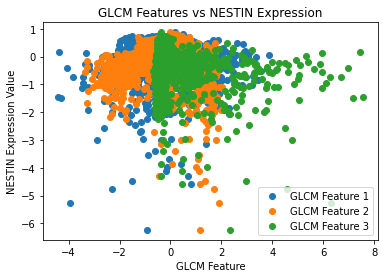

Correlation with NESTIN for GLCM Feature 1: -0.01064090139377589
Correlation with NESTIN for GLCM Feature 2: 0.009545429850437562
Correlation with NESTIN for GLCM Feature 3: -0.3216603861793691


In [26]:
""" Part (i) - Question 2: GLCM Feature Extraction """

from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Initialise empty list for GLCM features
glcm_features = []

# Loop through each image
for image in train_images:

    # convert image to gray scale
    image = rgb2gray(image)

    # Convert grayscale image to unsigned integer format
    image_uint8 = img_as_ubyte(image)

    glcm = graycomatrix(image_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Extract GLCM features
    contrast = graycoprops(glcm, 'contrast')
    correlation = graycoprops(glcm, 'correlation')
    homogeneity = graycoprops(glcm, 'homogeneity')

    # Combine GLCM features into a single feature vector
    glcm_feature_vector = np.concatenate([contrast.ravel(), correlation.ravel(), homogeneity.ravel()])

    # Append GLCM features and NESTIN value to the respective lists
    glcm_features.append(glcm_feature_vector)

# Convert lists to numpy arrays
X_glcm = np.array(glcm_features)
y_glcm = np.array(train_nestin_vals_np)

# Standardize the GLCM features
scaler = StandardScaler()
X_glcm_scaled = scaler.fit_transform(X_glcm)
#X_glcm_scaled = X_glcm

# Plot scatter plots for each GLCM feature against the NESTIN expression values
for i in range(X_glcm_scaled.shape[1]):
    plt.scatter(X_glcm_scaled[:, i], y_glcm, label=f'GLCM Feature {i+1}')

plt.xlabel('GLCM Feature')
plt.ylabel('NESTIN Expression Value')
plt.title('GLCM Features vs NESTIN Expression')
plt.legend()
plt.show()

# Calculate the correlation coefficient between each GLCM feature and NESTIN expression
correlation_coefficients_glcm = []
for i in range(X_glcm_scaled.shape[1]):
    correlation = np.corrcoef(X_glcm_scaled[:, i], y_glcm)[0, 1]
    correlation_coefficients_glcm.append(correlation)

# Print the correlation coefficients
for i, correlation in enumerate(correlation_coefficients_glcm):
    print(f"Correlation with NESTIN for GLCM Feature {i+1}: {correlation}")


2024-03-13 18:12:40.530541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


63/63 [==============================] - 207s 3s/step


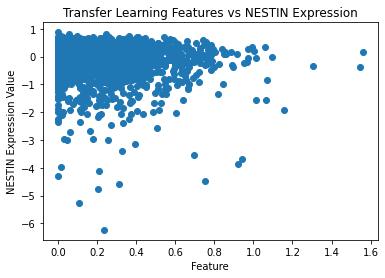

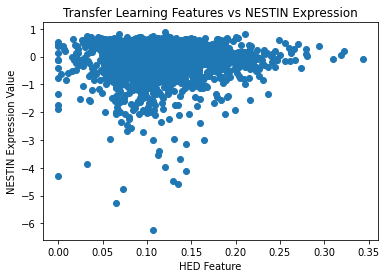

Correlation with NESTIN for Feature: -0.06956284900567675
Correlation with NESTIN for HED Feature: 0.0503779257836641


In [27]:
""" Part (i) - Question 2: Transfer Learning using VGG16 Pretrained Model """

import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without the top (fully connected) layers
pretrained_model = VGG16(weights='imagenet', include_top=False)

# Initialize lists for images and HED images
images = []
hed_images = []

# Loop through each image in the folder
for image in train_images:

    # Convert to HED  
    image_hed =  rgb2hed(image)

    # Resize images to fit pretrained model
    image = resize(image, (224, 224), anti_aliasing=True)
    hed_image = resize(image_hed, (224, 224), anti_aliasing=True)

    images.append(image)
    hed_images.append(hed_image)

# Convert lists to numpy arrays
tf_images = np.array(images)
tf_hed_images = np.array(hed_images)

# Extract features using the pre-trained model
vgg16_features = pretrained_model.predict(tf_images)
vgg16_hed_features = pretrained_model.predict(tf_hed_images)

# Flatten feature arrays
tf_flattened_features = vgg16_features.reshape(vgg16_features.shape[0], -1)
tf_flattened_hed_features = vgg16_hed_features.reshape(vgg16_hed_features.shape[0], -1)

# Plot scatter plot
plt.scatter(tf_flattened_features[:, 0], train_nestin_vals_np)
plt.xlabel('Feature')
plt.ylabel('NESTIN Expression Value')
plt.title('Transfer Learning Features vs NESTIN Expression')
plt.show()

# Plot scatter plot for HED images
plt.scatter(tf_flattened_hed_features[:, 0], train_nestin_vals_np)
plt.xlabel('HED Feature')
plt.ylabel('NESTIN Expression Value')
plt.title('Transfer Learning Features vs NESTIN Expression')
plt.show()

# Calculate correlation coefficient
tf_correlation_coefficient = np.corrcoef(tf_flattened_features[:, 0], train_nestin_vals_np)[0, 1]
print(f"Correlation with NESTIN for Feature: {tf_correlation_coefficient}")

# Calculate correlation coefficient for HED images
tf_hed_correlation_coefficient = np.corrcoef(tf_flattened_hed_features[:, 0], train_nestin_vals_np)[0, 1]
print(f"Correlation with NESTIN for HED Feature: {tf_hed_correlation_coefficient}")

### Part (i) - Feature Extraction Inclusion Justification

#### PCA:
There are several reasons why using PCA is beneficial in discovering new features. Firstly our dataset is high resolution images of specimens containing proteins. Thus we have high-dimensional image data. Using PCA helps in reducing the dimensionality of the feature space whilst preserving variance in the data. PCA can also identify potentially significant patterns and components in images whereby the components capture essential characteristics relevant to the target (in our case NESTIN). PCA also can filter out noise and irrelevant information like background colours and empty space. Therefore, the use of PCA can make modelling more efficient and accurate, resulting in reduction of overfitting susceptability. Therefore, it is important to use PCA in attempt to discover new features.

#### GLCM:
GLCM gives information about the spatial relationships of pixel intensity levels in images. This can capture textural features like coarseness, homogeneity, smoothness, granularity and so on. There may lie important information about cellular structures of the input images or patterns related to NESTIN expression. It can also highlight regions of high and low contast in images which may also correspond to areas of interest for NESTIN expression. Therefore, the use of GLCM is important in identifying potential new features in our input images.

#### Transfer Learning:
Transfer learning provides the ability to leverage pre-trained deep learing models. These models have already been trained to extract hierarchical features that are applicable to image recognition tasks. By tuning a pre-trained model to our task, we have the ability to discover potential new features that are well tailored for predicting NESTIN expression. In this case I use a VGG16 CNN model developed at Oxford University in attempt to identify new features in our images. The image has been said to achieve 92.7% accuraccy in image classification.

Overall, the inclusion of PCA, GLCM, and transfer learning in our modelling can enhance the predictive performance of models by capturing relevant patterns, textures, and hierarchical representations present in the images related to NESTIN expression. These techniques help in reducing the dimensionality of the feature space, extracting discriminative features, and leveraging knowledge from pre-trained models, ultimately improving the accuracy and robustness of your predictive model.


### Part (i) - Feature Extraction Discussion
From conducting feature extraction using the methods highlighted above, I was able to produce correlation coefficients to identify the relationship between new features with NESTIN expressions. Firstly, I performed PCA on the original training images. The best achieved correlation was -0.16 for 2 components. This demonstrates a very weak negative relationship between the features and NESTIN expression. I then decided to also run PCA on HED converted images as the HED colour space separates the image into channels corresponding to stains. Given we are using biomedical images, the conversion can be advantageous as it isolates specific tissue components which facilitates the extraction of relevant features. Using the HED converted images in the PCA, I was represented with a correlation of 0.48 for 2 components, implying that there is a moderately somewhat strong positive relationship between the HED image with 2 components and NESTIN expression. Using GLCM I was able to extract 3 features: contrast, correlation, and homogeneity. Homogeneity gave the best correlation with -0.33 demonstrating a moderately weak negative relationship with the NESTIN expression. I performed transfer learning using the VGG16 CNN model using both original and HED converted images. Both of these gave almost no correlation with the NESTIN expression (-0.057 and 0.062) which basically resembles no relationship.

When looking to how these new features can be used to enhance model performance, we must only consider features which demonstrate correlation with the NESTIN expression. In the context of what was learnt, we only give consideration to HED converted images through PCA with 2 components and GLCM Homogeneity feature. As these features presented correlation with the target variable, we use these in our models as they provide potential to provide decent model performance as relevant features for predicting NESTIN expression. However, neither feature presented what we would consider strong relationships (coefficients of greater than 0.7 or -0.7) and as such we cannot be overly optimistic about the performance our model will achieve using these features. I would not expect performance results to massively exceed the correlation present in the new features and thus do not expect models to achieve high levels of accuracy.

## Part (ii) - Apply Regression Models

### Background Context

For this question I presume that we are only using the newly extracted features from the images done in Part (i). For this question I also only use the features with the highest correlation to the NESTIN (target variable) as using features with very low correlation seems counterintuitive. In order to only use the extracted features, I also first perform the same feature extraction methods done in Part (i) on batch of 1000 test images independently to ensure models can be ran. The extracted features are concatenated for train and test independently. These are fed into both MLP and SVR models which are ran through a Grid Search over suitable variety of hyper parameters for model tuning. The best performing model is used for the scatter plots with performance metrics given.

In [28]:
""" Prepare TEST Data Arrays """

from skimage import io

# Initialise arrays for storing test images and their corresponding NESTIN values
test_images = []
test_nestin_vals = []

count = 0

# Image folder path
image_folder = 'test_images/'

# Loop through each image (random selection of 1000 to avoid kernel crashing)
for filename in os.listdir(image_folder):
    if count == 2000:
        break

    # Image path
    image_file = image_folder+filename

    # Extract image ID from filename
    image_id = filename.split('.')[0]

    # Some specimens may already be in RGB format (3 dimensions) therefore do not require conversion from rgba to rgb
    # try catch block overcomes errors
    try:
        I = rgba2rgb(io.imread(image_file))    # read sample RGB image
    except ValueError:
        I = io.imread(image_file)              # read D1 images

    # Append the values to the respective lists
    test_nestin_vals.append(test_df[test_df['image_id'] == image_id]['NESTIN'].values[0])
    test_images.append(I)
    count += 1

# Convert lists to numpy arrays
test_images_np = np.array(test_images)
test_nestin_vals_np = np.array(test_nestin_vals)

In [29]:
""" PCA Feature Extraction on TEST images """

""" Obtained much better correlation results when first converting the images to HED formats
    Thus i run the PCA on the HED images. """

from sklearn.decomposition import PCA

# Initialise lists for PCA features
hed_pca_test_feature_vectors = []

# Loop through each image
for image in test_images:

    # Convert to HED  
    image_hed = rgb2hed(image)

    # Flatten the image into a feature vector
    flattened_image = image_hed.flatten()
    hed_pca_test_feature_vectors.append(flattened_image)

# Convert the list of feature vectors to a numpy array
X_test_hed = np.array(hed_pca_test_feature_vectors)

# Apply PCA to determine the number of components explaining 95% of the variance
test_hed_pca_full = PCA()
X_test_hed_pca_full = test_hed_pca_full.fit_transform(X_test_hed)

# Determine the number of components explaining 95% of the variance
explained_variance_ratio_cumulative_hed = np.cumsum(test_hed_pca_full.explained_variance_ratio_)
num_components_95_percent_hed = np.argmax(explained_variance_ratio_cumulative_hed >= 0.95) + 1

# Apply PCA with the determined number of components used in test image (for feature balance)
pca2 = PCA(n_components=1535)
X_test_hed_pca = pca2.fit_transform(X_test_hed)

# Print the explained variance ratio
print(f"Number of dimensions explaining 95% variance: {num_components_95_percent_hed}")

# Initiate correlation coefficients list
test_hed_pca_correlation_coefficients = []

# Iterate over the number of PCA components
for i in range(X_test_hed_pca.shape[1]):
    pca_component = X_test_hed_pca[:, i]

    # Calculate correlation coefficient of PCA component with NESTIN and appen to list
    correlation = np.corrcoef(pca_component, test_nestin_vals_np)[0, 1]
    test_hed_pca_correlation_coefficients.append((i, correlation))

# Sort correlation coefficients based on the absolute value of correlation
test_hed_pca_correlation_coefficients_sorted = sorted(test_hed_pca_correlation_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 correlation coefficients
print("\nTop 5 Correlation Coefficients:")
for i in range(min(5, len(test_hed_pca_correlation_coefficients_sorted))):
    index, correlation = test_hed_pca_correlation_coefficients_sorted[i]
    print(f"Correlation with NESTIN for PCA Component {index+1}: {correlation}")

# Get the index of the PCA component with the highest correlation with NESTIN
index_of_best_correlation = test_hed_pca_correlation_coefficients_sorted[0][0]


Number of dimensions explaining 95% variance: 1621

Top 5 Correlation Coefficients:
Correlation with NESTIN for PCA Component 2: -0.4740893281195784
Correlation with NESTIN for PCA Component 3: 0.2954974323525532
Correlation with NESTIN for PCA Component 1: 0.25982562565428946
Correlation with NESTIN for PCA Component 4: 0.23681741752870974
Correlation with NESTIN for PCA Component 20: -0.05468725604733595


In [30]:
""" GLCM Feature Extraction for TEST images"""

from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Initialise empty list for GLCM features
test_glcm_features = []

# Loop through each image
for image in test_images:

    # convert image to gray scale
    image = rgb2gray(image)

    # Convert grayscale image to unsigned integer format
    image_uint8 = img_as_ubyte(image)

    test_glcm = graycomatrix(image_uint8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Extract GLCM features
    contrast = graycoprops(test_glcm, 'contrast')
    correlation = graycoprops(test_glcm, 'correlation')
    homogeneity = graycoprops(test_glcm, 'homogeneity')

    # Combine GLCM features into a single feature vector
    test_glcm_feature_vector = np.concatenate([contrast.ravel(), correlation.ravel(), homogeneity.ravel()])

    # Append GLCM features 
    test_glcm_features.append(test_glcm_feature_vector)

# Convert lists to numpy arrays
test_X_glcm = np.array(test_glcm_features)
test_y_glcm = np.array(test_nestin_vals_np)

# Standardize the GLCM features
scaler = StandardScaler()
test_X_glcm_scaled = scaler.fit_transform(test_X_glcm)

# Calculate the correlation coefficient between each GLCM feature and NESTIN expression
test_correlation_coefficients_glcm = []
for i in range(test_X_glcm_scaled.shape[1]):
    correlation = np.corrcoef(test_X_glcm_scaled[:, i], test_y_glcm)[0, 1]
    test_correlation_coefficients_glcm.append(correlation)

# Print the correlation coefficients
for i, correlation in enumerate(test_correlation_coefficients_glcm):
    print(f"Correlation with NESTIN for GLCM Feature {i+1}: {correlation}")


Correlation with NESTIN for GLCM Feature 1: -0.4313921806205048
Correlation with NESTIN for GLCM Feature 2: 0.4120181205267575
Correlation with NESTIN for GLCM Feature 3: -0.012476072953762393


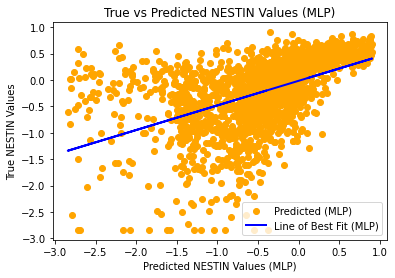

Best hyperparameters for MLPRegressor:
{'activation': 'relu', 'hidden_layer_sizes': (200, 100, 50), 'max_iter': 3000, 'solver': 'adam'}

Performance metrics for MLP with Linear Regression:
RMSE: 0.5582444219644161
R2 Score: 0.256494235536191
Pearson Correlation Coefficient: 0.5064525994959361
Spearman Correlation Coefficient: 0.6021854672446887


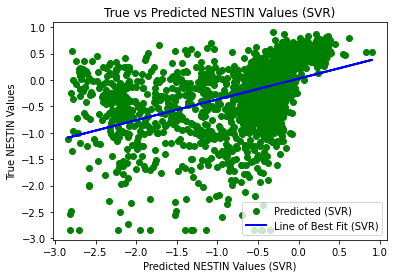

Best hyperparameters for SVR:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Performance Metrics for SVR with Linear Regression:
RMSE: 0.576454133863283
R2 Score: 0.2071973897346696
Pearson Correlation Coefficient: 0.45518939984875506
Spearman Correlation Coefficient: 0.6190259632535405


In [35]:
""" Question 2: Part (ii) - Creating MLP and SVR models """

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.neural_network import MLPRegressor

# Concatenate the selected features for train and test 
combined_train_features = np.concatenate((X_hed_pca[:, 1:2], X_glcm[:, 2:3]), axis=1)
combined_test_features = np.concatenate((X_test_hed_pca[:, 1:2], test_X_glcm[:, 1:2]), axis=1)

# name conventioning
y_test = test_nestin_vals_np

# SVR Hyperparameters for grid search
svr_param_grid = {
    'C': [0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# GRID Search for SVR hyper parameter selection
svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='r2')
svr_grid_search.fit(combined_train_features, train_nestin_vals_np)

# Get best SVR model from grid search
best_svr_model = svr_grid_search.best_estimator_

# Predict NESTIN values from SVR model
y_pred_svr = best_svr_model.predict(combined_test_features)

# MLP Hyperparameters for grid search
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 25), (200, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000, 3000]
}

# GRID search for MLP hyper parameter selection
mlp_grid_search = GridSearchCV(MLPRegressor(), mlp_param_grid, cv=5, scoring='r2')
mlp_grid_search.fit(combined_train_features, train_nestin_vals_np)

# Get best MLPRegressor model from grid search
best_mlp_model = mlp_grid_search.best_estimator_

# predict NESTIN values for MLP model
y_pred_mlp = best_mlp_model.predict(combined_test_features)

# Scale predictions to the same range as nestin expression values
# Define the minimum and maximum values of nestin expression
nestin_min = np.min(y_test)
nestin_max = np.max(y_test)

# Scale the predictions to the range of nestin expression values
scaled_y_pred_svr = (y_pred_svr - np.min(y_pred_svr)) / (np.max(y_pred_svr) - np.min(y_pred_svr)) * (nestin_max - nestin_min) + nestin_min
scaled_y_pred_mlp = (y_pred_mlp - np.min(y_pred_mlp)) / (np.max(y_pred_mlp) - np.min(y_pred_mlp)) * (nestin_max - nestin_min) + nestin_min

# Get line of best fit for MLP
mlp_regression = LinearRegression()
mlp_regression.fit(scaled_y_pred_mlp.reshape(-1, 1), y_test)

# Fit the line of best fit values
mlp_y_fit = mlp_regression.predict(scaled_y_pred_mlp.reshape(-1, 1))

# Scatter plot for true vs predicted NESTIN values for MLP
plt.scatter(scaled_y_pred_mlp, y_test, color='orange', label='Predicted (MLP)')
plt.plot(scaled_y_pred_mlp, mlp_y_fit, color='blue', linewidth=2, label='Line of Best Fit (MLP)')
plt.ylabel('True NESTIN Values')
plt.xlabel('Predicted NESTIN Values (MLP)')
plt.title('True vs Predicted NESTIN Values (MLP)')
plt.legend()
plt.show()

# Print the best hyperparameters for MLPRegressor
print("Best hyperparameters for MLPRegressor:")
print(mlp_grid_search.best_params_)

# Get required performance metrics from MLP
mse_mlp = mean_squared_error(y_test, mlp_y_fit)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, mlp_y_fit)
pearson_corr_mlp, _ = pearsonr(y_test, scaled_y_pred_mlp)
spearman_corr_mlp, _ = spearmanr(y_test, scaled_y_pred_mlp)

# Print performance metrics for MLP with linear regression
print("\nPerformance metrics for MLP with Linear Regression:")
print(f"RMSE: {rmse_mlp}")
print(f"R2 Score: {r2_mlp}")
print(f"Pearson Correlation Coefficient: {pearson_corr_mlp}")
print(f"Spearman Correlation Coefficient: {spearman_corr_mlp}")

# Get line of best fit for SVR
svr_regression = LinearRegression()
svr_regression.fit(scaled_y_pred_svr.reshape(-1, 1), y_test)

# Fit line of best fit values
svr_y_fit = svr_regression.predict(scaled_y_pred_svr.reshape(-1, 1))

# Scatter plot for true vs predicted NESTIN values for SVR
plt.scatter(scaled_y_pred_svr, y_test, color='green', label='Predicted (SVR)')
plt.plot(scaled_y_pred_svr, svr_y_fit, color='blue', linewidth=2, label='Line of Best Fit (SVR)')
plt.ylabel('True NESTIN Values')
plt.xlabel('Predicted NESTIN Values (SVR)')
plt.title('True vs Predicted NESTIN Values (SVR)')
plt.legend()
plt.show()

# Calculate required performance metrics for SVR
mse_svr = mean_squared_error(y_test, svr_y_fit)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, svr_y_fit)
pearson_corr_svr, _ = pearsonr(y_test, scaled_y_pred_svr)
spearman_corr_svr, _ = spearmanr(y_test, scaled_y_pred_svr)

# Print the best hyperparameters for SVR
print("Best hyperparameters for SVR:")
print(svr_grid_search.best_params_)

# Print performance metrics for SVR with linear regression
print("\nPerformance Metrics for SVR with Linear Regression:")
print(f"RMSE: {rmse_svr}")
print(f"R2 Score: {r2_svr}")
print(f"Pearson Correlation Coefficient: {pearson_corr_svr}")
print(f"Spearman Correlation Coefficient: {spearman_corr_svr}")

# Question 3: Using Convolutional Neural Networks

## Part (i)

### Architectural Background:

For question 3 I realised we could utilise the DCS batch computing system and therefore I completed this question using the DCS batch system on campus computers so the plots are bigger than the others.

I define a custom class ProteinDataset that inherits from torch.utils.data.Dataset. This class is responsible for loading images and their corresponding NESTIN expression levels from my image folderss (train_images and test_images).

Data Transformations: Using torchvision.transforms.Compose. images are resized to 224x224 pixels and converted to tensors to keep consistency among the different image specimens. I also normalize the images using common normalizations from ImageNET model results.

Load Data: Instantiate ProteinDataset for both training and testing datasets.

Define Data Loaders: Create data loaders for both the training and testing datasets using torch.utils.data.DataLoader for efficiency.

Model Architecture: CNN architecture is defined inside the CNN class. This CNN architecture consists of three convolutional layers followed by max-pooling layers and two fully connected layers. ReLU activation function is applied after each convolutional layer.

Initialize Model, Loss Function, and Optimizer: Instantiate the CNN model, Use L1SmoothLoss() which behaves similar to Huber Loss function as well as Adam optimizer, learning rate of 0.001 and weight decay.

Training the Model: CNN model trains on the training dataset for a 5 epochs. Each epoch iterates over batches of training data, computes the loss, performs backpropagation, and updates the model parameters.

Evaluation: Evaluation using model.eval(). Iterates over batches of test data, computes predictions, and stores them along with the true values.

Scatter Plot: Produced as required.

Compute Performance Metrics: Computed as required.

Plot Convergence Curves: Plots the convergence curves as required.

### CNN Parameter Experimentation Background

Experimented with Epoch sizes, Data Augmentation, Batch Normalization, Regularization, Learning Rate Scheduling, Drop-out. Found that below simpler combination produced best R2 score and correlations despite testing many complex architectures.

Batch Normalization on the CNN Layers did not improve performance.

Found using 5 epochs was better than 10+ suggesting higher than 5 lead to the model overfitting and the model memorizing training data rather than generalizing to unseen data.

Different Loss functions trialed but found L2SmoothLoss which is like Huber Loss performed best.

Tried implementing learning rate scheduling rather than a fixed learning rate but also did not improve performance.

Retained use of dropout.

Retained basic Regularization and Normalization.

Tried implementing random Data Augmentation (Rotation/contrast/hue randomness) but significantly hindered performance.

Experimented different hyperparameters (learning rates, activation functions) but found the hyperparameters Relu, Adam (which also were best in grid search from question 2) were best with smaller learning rates.

Epoch [1/5], Loss: 0.3086
Epoch [2/5], Loss: 0.1092
Epoch [3/5], Loss: 0.1009
Epoch [4/5], Loss: 0.0990
Epoch [5/5], Loss: 0.0910


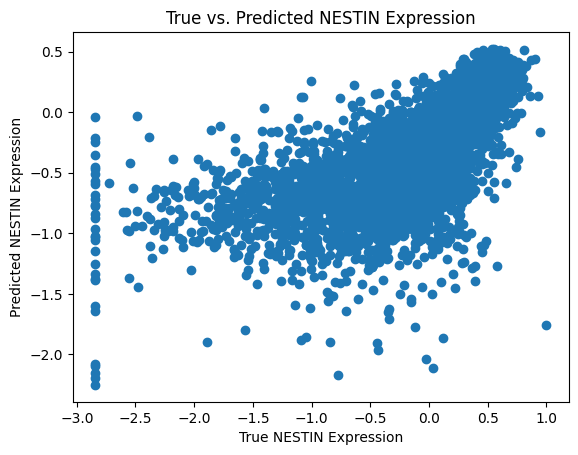

RMSE: 0.5366
Pearson Correlation Coefficient: 0.6333
Spearman Correlation Coefficient: 0.7033
R2 Score: 0.3427


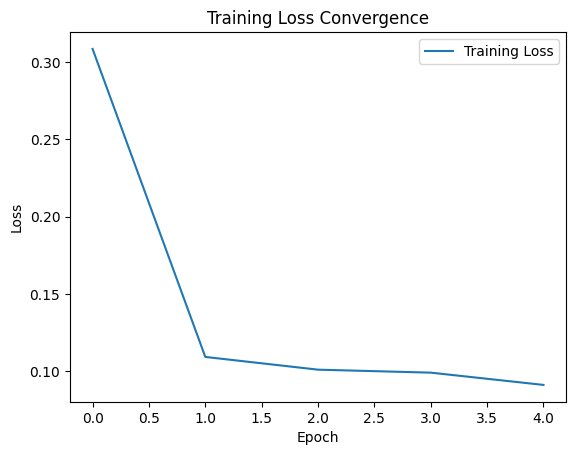

In [19]:
""" Part (i) - Question 3: CNN Model Code """

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from PIL import Image

# Utilise CUDA from DCS Batch System.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define custom data set class
class ProteinDataset(Dataset):

    # Class constructor
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    # Gets the NESTIN expression value for the image
    def __getitem__(self, idx):
        image_name = self.df.iloc[idx]['image_id'] + '.png'
        image_path = os.path.join(self.root_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        expression_level = self.df.iloc[idx]['NESTIN']

        # Run the transformation on the image
        if self.transform:
            image = self.transform(image)
        
        return image, expression_level

# Image transformation (resizing, tensor conversion and normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

# Create the train and test data set using custom dataset class
train_dataset = ProteinDataset(train_df, root_dir='train_images/', transform=transform)
test_dataset = ProteinDataset(test_df, root_dir='test_images/', transform=transform)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create CNN architecture as described
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)     # Layer 1: 3 input channels, 32 output channels, 3x3 kernel size, padding=1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)    # Layer 2: 32 input channels, 64 output channels, 3x3 kernel size, padding=1
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)   # Layer 3: 64 input channels, 128 output channels, 3x3 kernel size, padding=1
        self.pool = nn.MaxPool2d(2, 2)                              # Max pooling: 2x2 kernel size, stride=2
        self.fc1 = nn.Linear(128 * 28 * 28, 512)                    # Fully connected layer 1: input size determined by conv3 output, output size 512
        self.fc2 = nn.Linear(512, 1)                                # Fully connected layer 2: input size 512, output size 1
        self.relu = nn.ReLU()                                       # Activation function
        self.dropout = nn.Dropout(0.5)                              # Dropout layer with 50% probability

    # Forward pass
    def forward(self, x):

        # Applies convolution, activation and max pooling
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))

        # Computes the correct size of the flattened tensor
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.relu(self.fc1(x))                                  # Applies activation function to first fully connected laayer
        x = self.fc2(x)                                             # Output layer
        return x

# Initialize the CNN model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adds L2 regularization with weight decay

# Training the model
num_epochs = 5
train_losses = []

# Iterate over batches of data in training loader
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()                                           # Zero the gradients to prevent accumulation
        outputs = model(images)                                         # Forward pass: compute predicted outputs
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()                                                 # Backward pass that computes gradient of the loss
        optimizer.step()                                                # Updatea the weights of the model
        running_loss += loss.item() * images.size(0)                    # Updates the running loss for this epoch
    
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

# Model evaluation arrays
model.eval()
predicted_values = []
true_values = []

# Disables gradient calculation
with torch.no_grad():

    # Iterates over batches in test loader
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)                                 # Forward pass
        predicted_values.extend(outputs.cpu().numpy())
        true_values.extend(labels.cpu().numpy())

# Required to remove the data type from array and keep only the float prediction values
predicted_values = [value[0] for value in predicted_values]

# Plots the scatter for true vs predicted NESTIN values
plt.scatter(true_values, predicted_values)
plt.xlabel('True NESTIN Expression')
plt.ylabel('Predicted NESTIN Expression')
plt.title('True vs. Predicted NESTIN Expression')
plt.show()

# Computes the required performance metrics
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
pearson_corr, _ = pearsonr(true_values, predicted_values)
spearman_corr, _ = spearmanr(true_values, predicted_values)
r2 = r2_score(true_values, predicted_values)

print(f'RMSE: {rmse:.4f}')
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'R2 Score: {r2:.4f}')

# Plots convergence curves
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Convergence')
plt.legend()
plt.show()

## Part (ii)

### Architectural Background:
This works similar to the above CNN but now we simultaneously predict all 5 of the required protein expressions.

The architecture is almost identical to the one outlined above and thus to avoid repition i only will discuss new functionality.

As we are performing leave one specimen out validation, we now use train images folder which contains every image and the original df which has all the specimens and image protein expressions.

Architecture is the same except we now have target proteins in the class constructor and we have an output layer with 5 neurons for the 5 protein target expressions.

The model now iterates over each specimen performing the leave one specimen out crosss validation. The dictionaries are used to collect the specific data for each specimen and protein. On each iteration the CNN class is called to construct the train and test laoders which are now based on the current specimens vs the remaining specimens rather than the train and test we have been using prior. Most of the remaining logic remains the same.

As most the logic is the same, only updates to the architecture have been commented in the code.


Evaluating model performance with A1 as test set...
Epoch [1/5], Loss: 0.2509
Epoch [2/5], Loss: 0.1719
Epoch [3/5], Loss: 0.1708
Epoch [4/5], Loss: 0.1528
Epoch [5/5], Loss: 0.1347

Evaluating model performance with B1 as test set...
Epoch [1/5], Loss: 0.2464
Epoch [2/5], Loss: 0.1629
Epoch [3/5], Loss: 0.1652
Epoch [4/5], Loss: 0.1447
Epoch [5/5], Loss: 0.1267

Evaluating model performance with C1 as test set...
Epoch [1/5], Loss: 0.2188
Epoch [2/5], Loss: 0.1641
Epoch [3/5], Loss: 0.1535
Epoch [4/5], Loss: 0.1400
Epoch [5/5], Loss: 0.1190

Evaluating model performance with D1 as test set...
Epoch [1/5], Loss: 0.2309
Epoch [2/5], Loss: 0.1618
Epoch [3/5], Loss: 0.1527
Epoch [4/5], Loss: 0.1362
Epoch [5/5], Loss: 0.1227
Overall Protein Model Metrics.


,Protein,RMSE,Pearson Correlation,Spearman Correlation,R2 Score
0,EGFR,0.209885,0.708687,0.693285,0.496555
1,PTEN,0.669337,0.834295,0.718629,0.651496
2,NESTIN,0.415002,0.782488,0.817161,0.606300
3,SOX2,0.689423,0.733351,0.787356,0.524756
4,MET,0.599124,0.789599,0.695407,0.591638



Average Performance Metrics Based on Specimens


,Protein,Average RMSE,RMSE Std Dev,Average Pearson Correlation,Pearson Correlation Std Dev,Average Spearman Correlation,Spearman Correlation Std Dev,Average R2 Score,R2 Score Std Dev
0,EGFR,0.206648,0.047854,0.666864,0.149486,0.605325,0.157921,0.328822,0.166109
1,PTEN,0.676169,0.056777,0.851377,0.018526,0.625470,0.186652,0.634239,0.098642
2,NESTIN,0.393539,0.094646,0.779531,0.040367,0.708123,0.162597,0.556992,0.089112
3,SOX2,0.668912,0.167181,0.701870,0.135095,0.696671,0.198219,0.467012,0.212259
4,MET,0.572549,0.086986,0.801248,0.061787,0.688360,0.109226,0.567592,0.152382


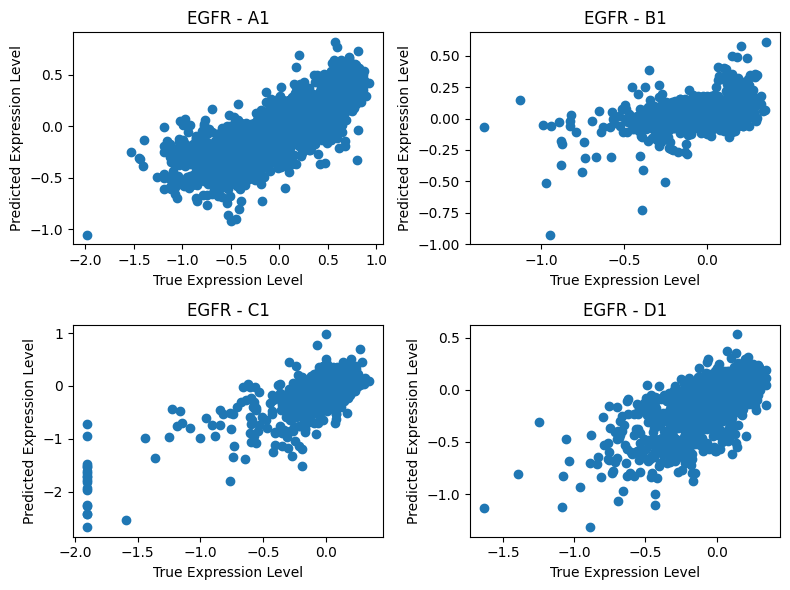

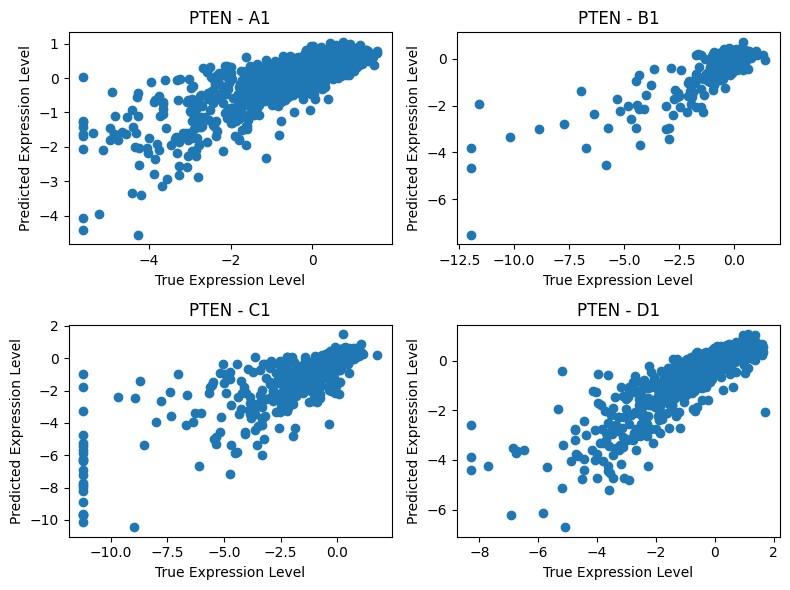

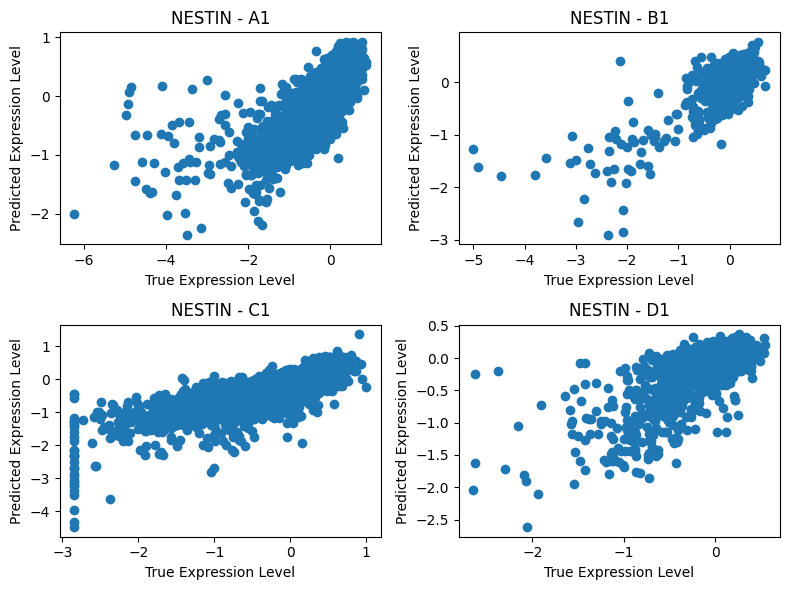

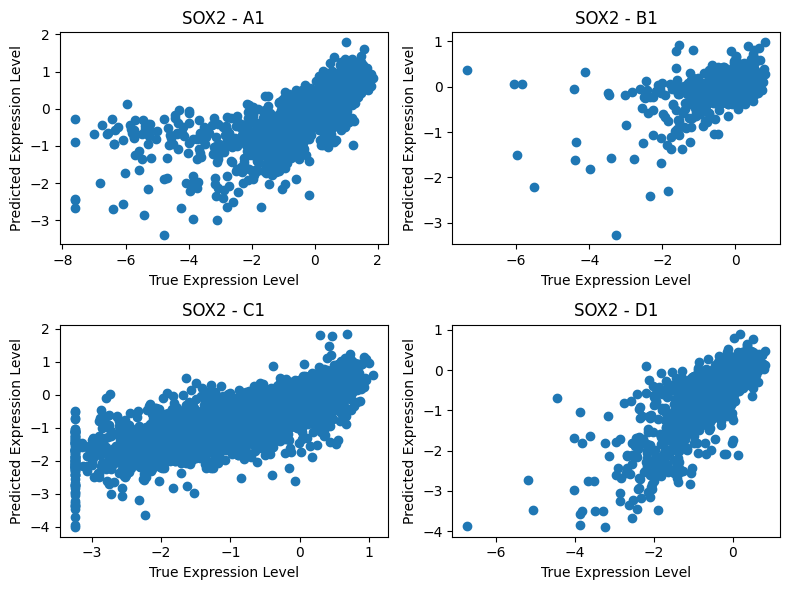

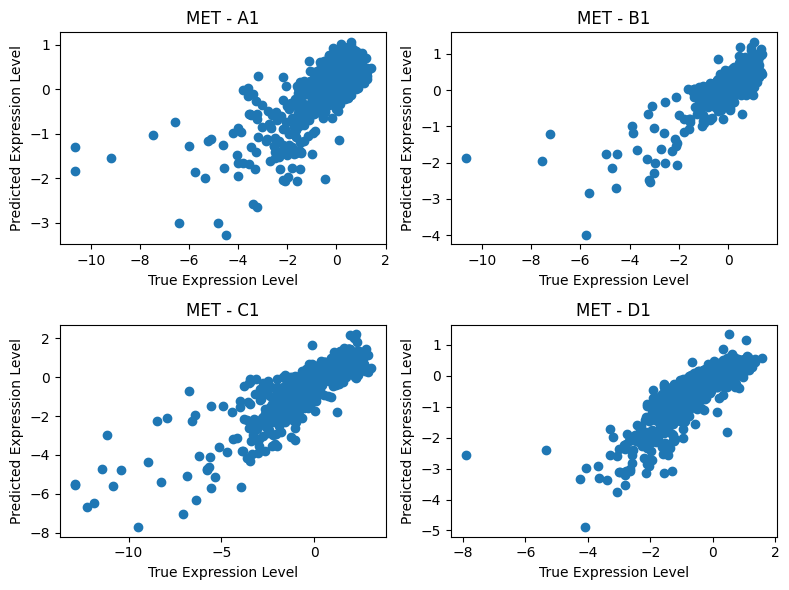

In [84]:
""" Part (ii) - Question 3: Simultaneous CNN for 5 target proteins """

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from PIL import Image
import warnings

# Suppress the warnings
warnings.filterwarnings("ignore", message="Using a target size .*")

# Use CUDA from DCS Batch System
device = torch.device('cuda')

# Define custom data set class (Same as part (i) except retrieves all target proteins expression values).
class ProteinDataset(Dataset):

    # Class constructor
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    # Gets all the protein expression values (5 target proteins)
    def __getitem__(self, idx):
        image_name = self.df.iloc[idx]['image_id'] + '.png'
        image_path = os.path.join(self.root_dir, image_name)
        image = Image.open(image_path).convert('RGB')
        expression_levels = self.df.iloc[idx][['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']]    # Get expressions for ALL target proteins
        expression_levels = np.array(expression_levels, dtype=np.float32)
        
        if self.transform:
            image = self.transform(image)
        
        return image, expression_levels

# Define data transformations with resizing, tensor conversion and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create CNN architecture as described (Same as part (i) except with output layer with 5 neurons)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 5)                                # Output layer now with 5 neurons for 5 proteins
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  
        
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the different specimens
test_specimens = ['A1', 'B1', 'C1', 'D1']

# Target Protein
protein_names = ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']

# Initialise dictionaries to store overall protein expression values and predictions
true_values_dict = {protein: [] for protein in protein_names}
predicted_values_dict = {protein: [] for protein in protein_names}

# Initialize dictionaries to store true and predicted values for each test specimen and protein
data_dict = {}

# Loops over test specimens
for test_specimen in test_specimens:

    # Initialize a dictionary for the current test specimen
    specimen_data = {}

    # Loop over proteins
    for protein in protein_names:
        # Initialize lists to store true and predicted values for the current protein
        true_values = []
        predicted_values = []
        
        # Store the lists in the specimen_data dictionary
        specimen_data[protein] = {'true_values': true_values, 'predicted_values': predicted_values}
    
    # Store the specimen_data dictionary in the data_dict with the test specimen as the key
    data_dict[test_specimen] = specimen_data

# Leave one specimen out validation
for test_specimen in test_specimens:
    print(f"\nEvaluating model performance with {test_specimen} as test set...")
    
    # Create dataset and data loader for training and testing
    train_dataset = ProteinDataset(df, root_dir='images/', transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  
    test_df = df[df['specimen_id'] == test_specimen]
    test_dataset = ProteinDataset(test_df, root_dir='images/', transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize the model, loss function, and optimizer (same as part (i))
    model = CNN().to(device)
    criterion = nn.SmoothL1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    
    # Training the model (same as part (i))
    num_epochs = 5
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels.float())
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')
    
    # Evaluation on the test set (same as part (i) but appends all the values to relevant dictionaries)
    model.eval()
    predicted_values = {protein: [] for protein in protein_names}
    true_values = {protein: [] for protein in protein_names}

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            for i, protein in enumerate(protein_names):
                true_values[protein].extend(labels.cpu().numpy()[:, i])
                predicted_values[protein].extend(outputs.cpu().numpy()[:, i])
                true_values_spec = labels.cpu().numpy()[:, i]
                predicted_values_spec = outputs.cpu().numpy()[:, i]
                data_dict[test_specimen][protein]['true_values'].extend(true_values_spec)
                data_dict[test_specimen][protein]['predicted_values'].extend(predicted_values_spec)

    for protein in protein_names:
        true_values_dict[protein].extend(true_values[protein])
        predicted_values_dict[protein].extend(predicted_values[protein])

# Computes overall performance metrics not regarding specimen
performance_metrics = []

for protein in protein_names:
    true_values = np.array(true_values_dict[protein])
    predicted_values = np.array(predicted_values_dict[protein])

    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    pearson_corr, _ = pearsonr(true_values, predicted_values)
    spearman_corr, _ = spearmanr(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)

    performance_metrics.append({
        'Protein': protein,
        'RMSE': rmse,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr,
        'R2 Score': r2,
    })

# Compute performance metrics regarding individual specimens as well as target proteins
avg_performance_metrics = []

# Produces required performance metrics as averages with standard deviations
for protein in protein_names:
    rmse_list = []
    pearson_corr_list = []
    spearman_corr_list = []
    r2_list = []

    for test_specimen in test_specimens:
        true_values = np.array(data_dict[test_specimen][protein]['true_values'])
        predicted_values = np.array(data_dict[test_specimen][protein]['predicted_values'])

        rmse_list.append(np.sqrt(mean_squared_error(true_values, predicted_values)))
        pearson_corr_list.append(pearsonr(true_values, predicted_values)[0])
        spearman_corr_list.append(spearmanr(true_values, predicted_values)[0])
        r2_list.append(r2_score(true_values, predicted_values))

    avg_rmse = np.mean(rmse_list)
    std_rmse = np.std(rmse_list)
    avg_pearson_corr = np.mean(pearson_corr_list)
    std_pearson_corr = np.std(pearson_corr_list)
    avg_spearman_corr = np.mean(spearman_corr_list)
    std_spearman_corr = np.std(spearman_corr_list)
    avg_r2 = np.mean(r2_list)
    std_r2 = np.std(r2_list)

    avg_performance_metrics.append({
        'Protein': protein,
        'Average RMSE': avg_rmse,
        'RMSE Std Dev': std_rmse,
        'Average Pearson Correlation': avg_pearson_corr,
        'Pearson Correlation Std Dev': std_pearson_corr,
        'Average Spearman Correlation': avg_spearman_corr,
        'Spearman Correlation Std Dev': std_spearman_corr,
        'Average R2 Score': avg_r2,
        'R2 Score Std Dev': std_r2
    })

# Display overall performance metrics
print("Overall Protein Model Metrics.")
performance_df = pd.DataFrame(performance_metrics)
display(performance_df)

# Display performance metrics as an average based on the individual specimens for each target variable 
print("\nAverage Performance Metrics Based on Specimens")
avg_performance_df = pd.DataFrame(avg_performance_metrics)
display(avg_performance_df)

# Generates the 20 required scatter plots for true expression values vs predicted for each specimen and each target protein
for protein in protein_names:
    plt.figure(figsize=(8, 6))
    for i, test_specimen in enumerate(test_specimens):
        plt.subplot(2, 2, i + 1)
        true_values = data_dict[test_specimen][protein]['true_values']
        predicted_values = data_dict[test_specimen][protein]['predicted_values']
        plt.scatter(true_values, predicted_values)
        plt.xlabel('True Expression Level')
        plt.ylabel('Predicted Expression Level')
        plt.title(f'{protein} - {test_specimen}')
    plt.tight_layout()
    plt.show()

## Part (iii)

One limitation of the optimal pipeline is the reliance solely on image data for predicting protein expression levels. While the images provide spatial information about the protein distributions within cells, they may not be capturing all the relevant biological features that influence protein expression. One experimentation that could be incorperated could be checking correlation of other proteins with target proteins. These new features could be used to enhance the performance of predictive models on target proteins. Incorperating high correlating feature extraction (like PCA) into the CNNs could provide new important features into the predictive model that could enhance performance. Right now we are using a single CNN, we could potentially incorperate ensemble learning by incorperating different models into the prediction process from sub sections of the training data which can leverage diverse sources to prevent overfitting. Also experimenting with different deep learning models and transfer learning could improve the model performance. Also incorperating new data such as omics data could improve performance. Omics data types, such as transcriptomic or epigenomic data, with protein expression data may improve performance. Multi-omics integration approaches, such as canonical correlation analysis (CCA) or integrative clustering, can reveal hidden relationships between different molecular layers and improve predictive modeling. 